### Importing libraries and the customers data set

In [2]:
# Importing Libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Turning project folder path into a string
path=r'/Users/jasmeetakaur/Downloads/Jasmeeta/Data Immersion Course/Achievement 1/Achievement 4/Instacart Basket Analysis'

In [4]:
# Importing the “ords_prods_customer_merge.pkl file
df_ords_prods_customer_merge=pd.read_pickle(os.path.join(path,'02 Data/Prepared Data/df_ords_prods_customer_merge.pkl'))

In [4]:
df_ords_prods_customer_merge.head(10)

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,Busiest_day,Busiest/Slowest days,busiest_period_of_day,max_order,Loyalty_flag,mean_prices,Spending_flag,order_frequency,Frequency_flag,True
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy day,Busiest Days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy day,Regular busy days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy day,Busiest Days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy day,Regular busy days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy day,Slowest Days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy day,Busiest Days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy day,Busiest Days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy day,Regular busy days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy day,Busiest Days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
9,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy day,Regular busy days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both


### 3. Objective: Plotting Histogram for order_hour_of_day (smaller bin size)

<Axes: ylabel='Frequency'>

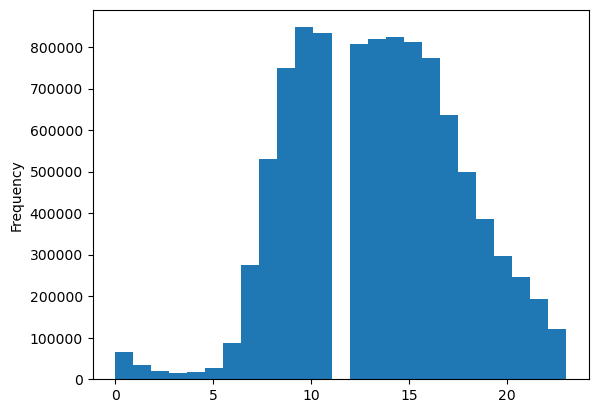

In [5]:
df_ords_prods_customer_merge['order_hour_of_day'].plot.hist(bins=25)

### 3. Objective: Plotting and Saving Histogram for order_hour_of_day (larger bin size)

Text(0.5, 1.0, 'Busiest Hour of the Day')

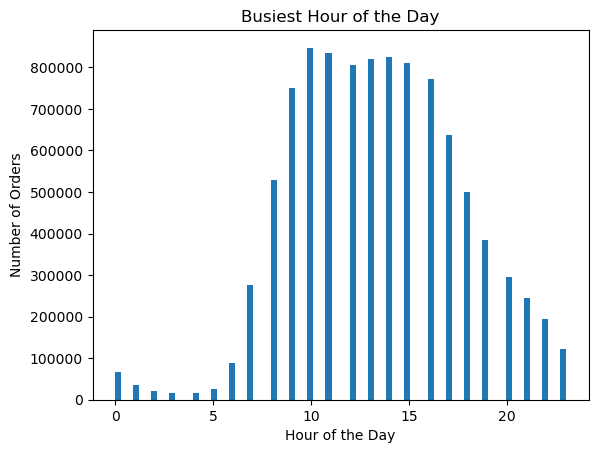

In [4]:
# Saving the histogram as an object
hist = df_ords_prods_customer_merge['order_hour_of_day'].plot.hist(bins=75)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Busiest Hour of the Day')


In [7]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_day.png'))

### Insight: The above histogram depicts that the maximum sales occur between 8 a.m. and 6 p.m.

### 4. Objective: Plotting bar graph for Loyalty flag

Text(0.5, 1.0, 'Distribution among customers based on Loyalty')

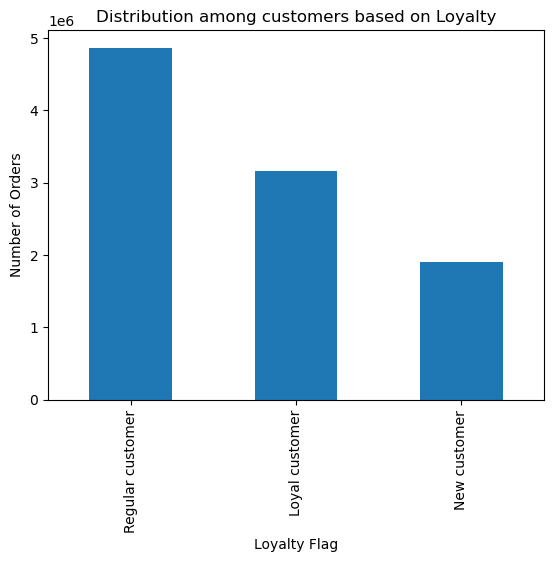

In [5]:
# Plotting the bar graph 
df_ords_prods_customer_merge['Loyalty_flag'].value_counts().plot.bar()
plt.xlabel('Loyalty Flag')
plt.ylabel('Number of Orders')
plt.title('Distribution among customers based on Loyalty')


### Insight: The above bar chart depicts that most of the orders are distributed among the Regular customers.

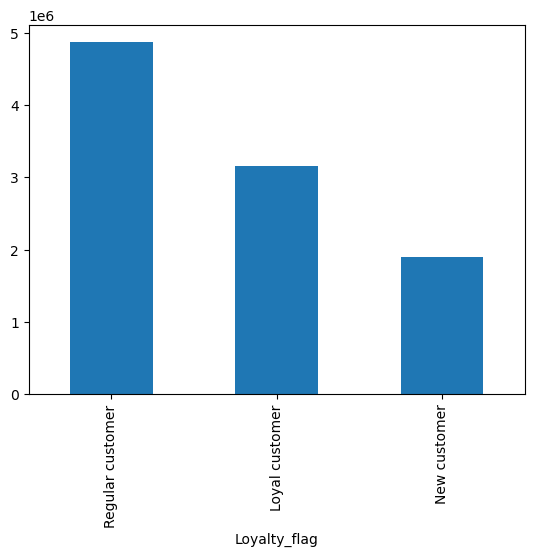

In [9]:
# Saving the bar chart as an object
bar = df_ords_prods_customer_merge['Loyalty_flag'].value_counts().plot.bar()

In [10]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Loyalty_flag.png'))

### 5. Objective: Plotting Line chart to check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [11]:
# Creating samples of data
np.random.seed(4)

In [12]:
# Create a list holding True/False values to test np.random.rand() <=0.7
dev = np.random.rand(len(df_ords_prods_customer_merge))<=0.7

In [13]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_customer_merge[dev]

In [14]:
# Store 30% of the sample in the dataframe small
small = df_ords_prods_customer_merge[~dev]

In [15]:
len(df_ords_prods_customer_merge)

9918253

In [17]:
len(big) + len(small)

9918253

### Using the more accurate sample (bigger sample-70%) to plot the line chart 

In [16]:
# Reducing the sample to only the columns necessary
df_3 = big[['order_hour_of_day','prices']]

Text(0.5, 1.0, 'Expenditure Vs Hour of the day')

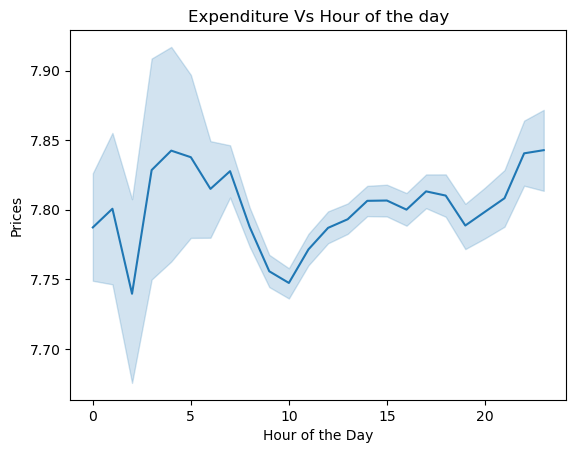

In [17]:
# Plotting a line chart from the sample data 
line_plot= sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')
plt.xlabel('Hour of the Day')
plt.ylabel('Prices')
plt.title('Expenditure Vs Hour of the day')


### The expenditure is varying with the hour of the day. On an average there is higher expenditure during the early morning hours and then during late night hours.

In [46]:
# Exporting the line chart as an object 
line_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_plot.png'))

### 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [23]:
df_4= small[['age','n_dependants']]

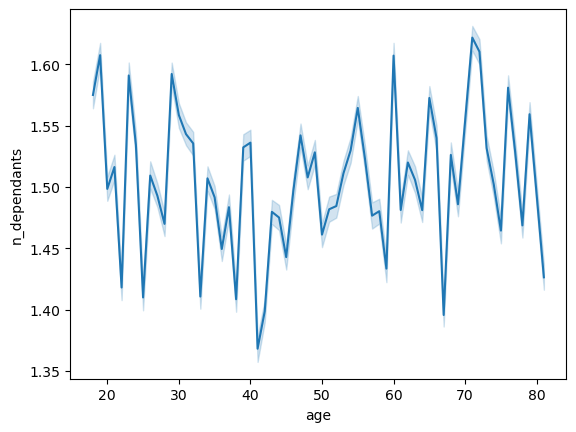

In [24]:
# Plotting a line chart from the sample data 
line = sns.lineplot(data = df_4, x = 'age',y = 'n_dependants')

### Insight: As expected from the question I plotted a line chart between age and no of dependants but found no evident relationship between them. So I explored the relation between age and family status, which shows that most of the customers are married depicted by the graph below

In [25]:
df_5= small[['age','fam_status']]

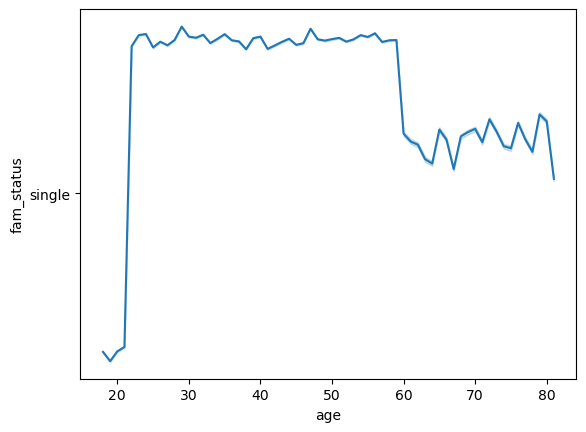

In [47]:
# Plotting a line chart from the sample data 
line_plot1 = sns.lineplot(data = df_5, x = 'age',y = 'fam_status')

In [48]:
# Exporting the line plot
line_plot1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_plot1.png'))

### Objective: Creating a scatter plot to explore whether there’s a connection between age and spending power (income) using the sns.scatterplot() function.

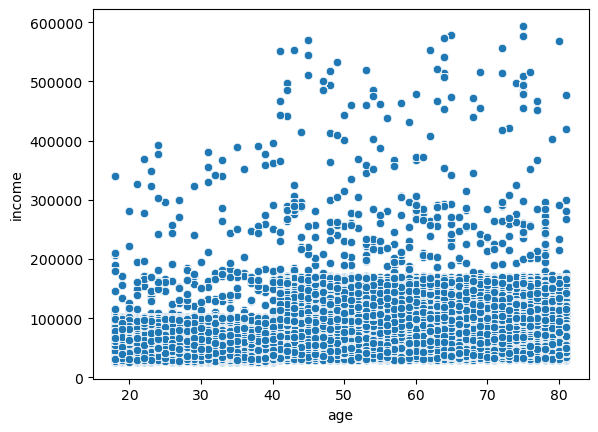

In [50]:
scatter_plot=sns.scatterplot(x = 'age', y = 'income',data = df_ords_prods_customer_merge)

### Insight: It appears from the scatter plot above that the people above the age of 40 have higher income.

In [51]:
# Exporting the scatter plot
scatter_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_plot.png'))